In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
#load the dataset
df = pd.read_csv('solar-power-output(in).csv')

print(df.head())

   temperature   humidity  solar_irradiance  wind_speed  solar_power_output
0    19.363503  75.852937        266.619636    5.190818          128.101772
1    33.767858  62.887709        587.710853    4.791819          290.911789
2    28.299849  44.762209        885.651252    0.256421          442.336390
3    24.966462  85.103602        759.002398    3.412478          380.261988
4    13.900466  74.778494        825.905033    3.801956          415.931953


In [16]:
#check for missing values
print(df.isnull().sum())

temperature           0
humidity              0
solar_irradiance      0
wind_speed            0
solar_power_output    0
dtype: int64


In [41]:
#features (independent var) and target (dependant var)
#independant var
X = df[['humidity', 'temperature', 'wind_speed', 'solar_irradiance']]
#dependant var
y = df['solar_power_output']

In [42]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
#create a LR model
model = LinearRegression()

#train the model
model.fit(X_train, y_train)

LinearRegression()

In [44]:
#make predictions on the test set
y_pred = model.predict(X_test)

In [45]:
y_pred

array([145.57713107,  58.80813609, 162.02529474, 389.82145928,
       499.91950595, 201.02821571, 280.32773309, 343.94995965,
       207.65845172, 274.08855806, 270.4758993 ,  71.45181395,
       429.27171131, 474.93452179, 131.00879231, 488.72382533,
       351.97648481,  66.01156112, 286.53039282, 315.26996556,
       156.25649584, 217.68415496, 328.50926609, 456.09724416,
       224.59964917, 343.33441392, 258.65661936, 253.27035923,
       487.33886963, 488.13938701, 352.87341422, 139.35221978,
       486.24574421, 166.59050111, 443.99714231, 498.93693594,
       440.23818943, 184.21480103, 497.81182989, 239.22808164,
       345.26650268, 281.3410799 , 215.84679473, 472.53738058,
       105.19383875, 353.92961077, 132.62179773, 496.30985098,
       472.03357269, 464.32390433,  68.39576649, 337.05784427,
       271.45779666, 142.00782193, 330.57420012, 209.16463828,
       431.33413853, 460.52547819, 271.68335515, 148.17216827,
       322.32496319, 189.54364633, 148.80585847,  54.32

In [46]:
#calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
#calculate r-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-Squared: {r2}")


Mean Squared Error: 29.46234596562648
R-Squared: 0.9983255901418433


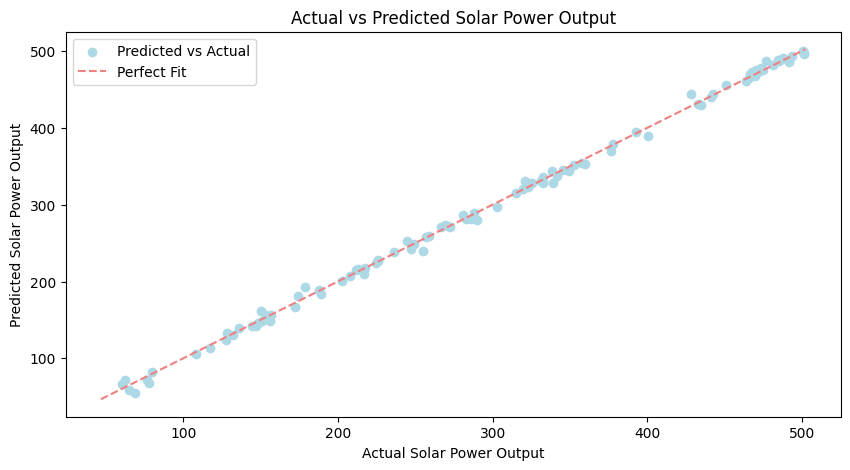

In [56]:
import matplotlib.pyplot as plt

# Scatter plot to compare actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='lightblue', label='Predicted vs Actual')

# Diagonal Line for perfect predictions
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='lightcoral', linestyle='--', label='Perfect Fit')

plt.xlabel("Actual Solar Power Output")
plt.ylabel("Predicted Solar Power Output")
plt.title("Actual vs Predicted Solar Power Output")
plt.legend()
plt.show()


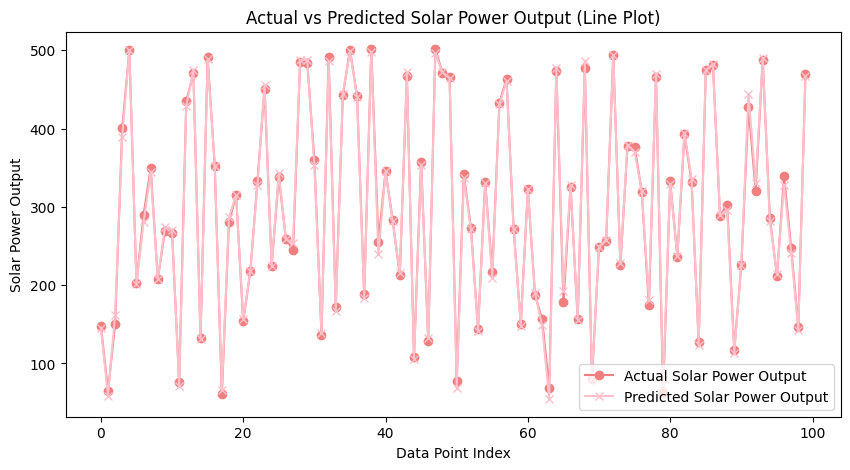

In [59]:
# Line plot to show predictions and actual values
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, label="Actual Solar Power Output", marker='o', color='lightcoral')
plt.plot(range(len(y_test)), y_pred, label="Predicted Solar Power Output", marker='x', color='pink')
plt.xlabel("Data Point Index")
plt.ylabel("Solar Power Output")
plt.title("Actual vs Predicted Solar Power Output (Line Plot)")
plt.legend()
plt.show()

In [52]:
import joblib
#save the model to a file
joblib.dump(model, 'solar_power_prediction_model.pkl')

['solar_power_prediction_model.pkl']

In [53]:
# Load the saved model
model = joblib.load('solar_power_prediction_model.pkl')

# New input data for prediction
# Example input (temperature, humidity, solar_irradiance, wind_speed)
new_data = np.array([[19.36, 75.85, 266.61, 5.19]])

# Predict solar power output
predicted_output = model.predict(new_data)
print(f"Predicted Solar Power Output: {predicted_output[0]} watts")

Predicted Solar Power Output: 25.511953868301422 watts


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
